# Fashion MNIST

In this application, we will continue to work on the Fashion MNIST dataset and will try to figure out how are CNNs used with the image data.

Note that we will create a very simple model here and will only talk about the architecture with limited features. Please feel free to add/modify the architecture as per your understanding.

### Libraries, data preprocessing, and visualizations

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
# Imporing the libraries as required. Note that we are using tensorflow.keras here.
import tensorflow as tf
# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Question-5 - Perform the above steps (in the given order) and answer the question.
Load the data (Fashion MNIST dataset: a built-in dataset from Keras library). 
Reshape the data
Normalize the data
Encode the target variable
What will be the shape of the encoded target variable (of the training set and test set)?


1. (60000, 10), (10000, 10)
2. (40000, 5), (10000, 5)
3. (40000, 8), (20000, 8)
4. (30000, 15), (30000, 10)

In [2]:
#Load the data

(X_train, y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [5]:
# encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [6]:
y_train_encoded.shape, y_test_encoded.shape

((60000, 10), (10000, 10))

**Answer:** (60000, 10), (10000, 10)

### Question-6 
Build a sequential CNN model with the architecture given below and answer the following question.

- First Conv2D - The input shape to the conv2D will be (28,28,1).
   * Number of filters = 64, kernel size = (3,3), and activation function 'relu', padding = 'same'. 
   * MaxPooling2D - the pool size will be (2,2) and padding = 'same'
- Second Conv2D 
   * Number of filters = 32, kernel size = (3,3), and activation function 'relu', padding='same'.
   * MaxPooling2D - the pool size will be (2,2) and padding = 'same'
   * Add a BatchNormalization layer
- Third Conv2D
   * Number of filters = 16, kernel size = (3,3), and activation function 'relu', padding='same'.
- Flatten 
- First Dense Layer: Add a dense layer with 32 neurons and activation function 'relu'
   * Dropout: add dropout with dropout rate = 0.25
- Second Dense Layer: Add a dense layer with 16 neurons and activation function 'relu'
- Output Layer: Add an output layer with 10 neurons and activation function = softmax
Compile the model using adam optimizer, categorical_crossentropy as the loss function, and with accuracy as the metric.

**Note**: Fix the random seed at 1 for random number generators.

In what range do training accuracy and the test accuracy lie after training the model for 5 epochs?

- `<`65% , `>`95% 
- `>`85% , `>`85% 
- `<`75%, `<`50% 
- `>`98%, `<`50% 

In [7]:
from tensorflow.keras import backend
backend.clear_session()

In [8]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1), padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
cnn_model.add(Flatten())

cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(16, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

In [9]:
cnn_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                        

In [10]:
cnn_model.fit(X_train_normalized, y_train_encoded, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5560 - accuracy: 0.8011
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3574 - accuracy: 0.8741
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3070 - accuracy: 0.8914
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2798 - accuracy: 0.9011
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2573 - accuracy: 0.9070


In [11]:
cnn_model.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 3s 10ms/step - loss: 0.2847 - accuracy: 0.8973 0s


[0.28471311926841736, 0.8973000049591064]

**Answer:** `>`85% , `>`85% 

### Question-7
What is the total number of parameters(including both trainable and non-trainable) for the model built in question-6?
- 49674 
- 46574 
- 49610 
- 42254 

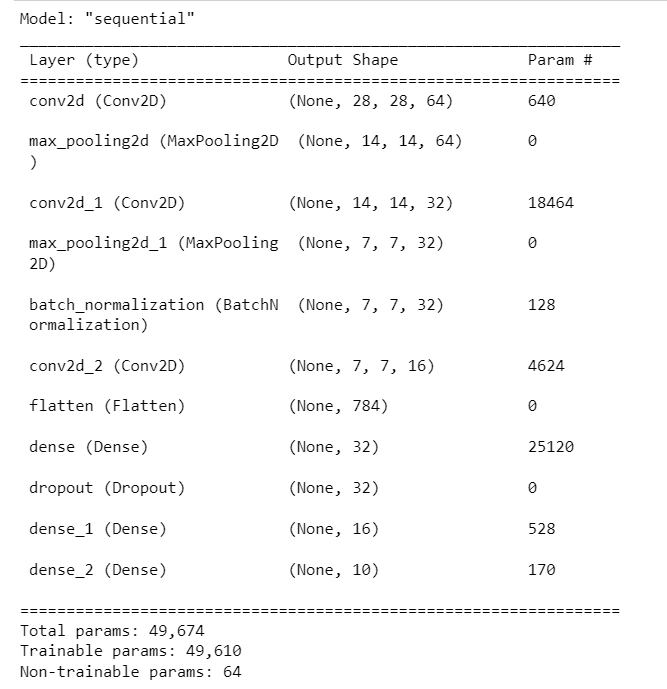

**Answer:**49674

### Question-9 
Build a CNN model with transfer learning with the following architecture as shown in the below image and answer the following question.

- Build a VGG16 Model with weights='imagenet' and include_top=False with input_shape=(224,224,3)

- Set the VGG16 trainable layers=False

- Build a sequential model over VGG16 and flatten the output of VGG16

- Dense_1 Layer: neurons=32 and activation='relu'

- Dense_2 Layer: neurons=16 and activation='relu'

- Output Layer: add an output layer with 10 neurons and activation as softmax

Compile the model using adam optimizer, categorical_crossentropy as the loss function.

**Note**: Fix the random seed at 1 for random number generators.

What will be the number of parameters in the first dense layer with 32 neurons (present after the flattened layer)?

- 802644 
- 802848 
- 65324 
- 48223 

In [12]:
from tensorflow.keras import backend
backend.clear_session()

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
# vgg_model.summary()

In [14]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [15]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(10, activation='softmax'))

In [16]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 15,518,234
Trainable params: 803,546
Non-trainable params: 14,714,688
_________________________________________________________________


**Answer:** 802848

### Question-10
For the model built in Question-9, add 1 more hidden layer with 16 neurons before the output softmax layer, activation function as ReLU, to answer the following question.

What is the total number of trainable parameters of this model?

- 600200 
- 800000 
- 803818 
- 500214 

In [17]:
from tensorflow.keras import backend
backend.clear_session()

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
# vgg_model.summary()
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False
new_model1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model1.add(Flatten())

# Adding a dense output layer
new_model1.add(Dense(32, activation='relu'))
new_model1.add(Dense(16, activation='relu'))
new_model1.add(Dense(16, activation='relu'))
new_model1.add(Dense(10, activation='softmax'))
new_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 15,518,506
Trainable params: 803,818
Non-t

**Answer:** 803818